In [1]:
import cv2
import numpy as np
import skimage as sk
from skimage import io, transform
import matplotlib.pyplot as plt
import matplotlib


In [2]:
pthalo_bl = io.imread('pthalo_bl_gs.png')[:, :, :-1]

In [3]:
pthalo_bl.shape

(251, 921, 3)

In [4]:
pthalo_bl

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
pthalo_bl_2 = transform.rotate(pthalo_bl, 90, resize = True)

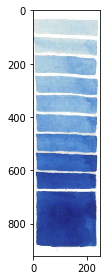

In [6]:
io.imshow(pthalo_bl_2)

In [65]:
#pthalo_bl_con = sk.color.convert_colorspace(pthalo_bl_2, 'RGB', 'HSV')

In [7]:
pthalo_means = pthalo_bl_2.mean(axis=1)

In [8]:
pthalo_means.shape

(921, 3)

In [9]:
pthalo_means

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       ...,
       [0.99890634, 0.99890634, 0.99890634],
       [0.99837513, 0.99837513, 0.99837513],
       [0.99837513, 0.99837513, 0.99837513]])

# ultramarine

In [10]:
ultra = io.imread('ultra.png')[:, :, :-1]
ultra_2 = transform.rotate(ultra, 90, resize = True)

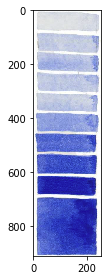

In [11]:
io.imshow(ultra_2)

In [88]:
#ultra_con = sk.color.convert_colorspace(ultra_2, 'RGB', 'HSV')

In [12]:
ultra_means = ultra_2.mean(axis=1)

(array([ 72., 102.,  81.,  56.,  21.,  56., 128., 264.,  47.,  94.]),
 array([0.59167253, 0.63250527, 0.67333802, 0.71417077, 0.75500352,
        0.79583626, 0.83666901, 0.87750176, 0.91833451, 0.95916725,
        1.        ]),
 <a list of 10 Patch objects>)

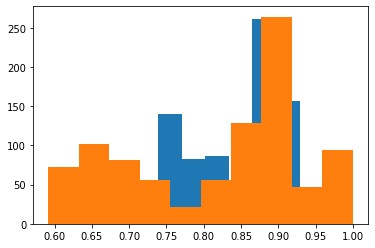

In [14]:
plt.hist(ultra_means[:,2])
plt.hist(pthalo_means[:,2])

# database

In [15]:
import pandas as pd

In [16]:
ultra_df = pd.DataFrame(ultra_means, columns=['r','g','b'])

In [17]:
ultra_df['name'] = 'ultra'

In [18]:
ultra_df['target'] = 0

In [19]:
ultra_df

,r,g,b,name,target
0,0.991923,0.989485,0.987860,ultra,0
1,0.994688,0.992329,0.991438,ultra,0
2,0.992219,0.991969,0.990798,ultra,0
3,0.991298,0.991391,0.989735,ultra,0
4,0.993297,0.993735,0.990766,ultra,0
...,...,...,...,...,...
905,0.636357,0.685712,0.855074,ultra,0
906,0.802297,0.833716,0.927943,ultra,0
907,0.921491,0.933974,0.972315,ultra,0
908,0.972112,0.973533,0.981673,ultra,0


In [20]:
pthalo_df = pd.DataFrame(pthalo_means, columns=['r','g','b'])

In [21]:
pthalo_df['name'] = 'pthalo_bl'

In [22]:
pthalo_df['target'] = 1

In [23]:
color_df = pd.concat([ultra_df, pthalo_df], ignore_index=True)

In [24]:
X = color_df[['r','g','b']]

In [25]:
X.shape

(1831, 3)

In [26]:
y = color_df['target']

In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1826    1
1827    1
1828    1
1829    1
1830    1
Name: target, Length: 1831, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn = KNeighborsClassifier(n_neighbors=2)

In [187]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [49]:
knn.score(X_test, y_test)

0.9781659388646288

In [50]:
y_pred = knn.predict(X_test)

In [51]:
from sklearn import metrics

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9781659388646288


# Try with a different image of ultra @ 100


In [33]:
ultra_test = io.imread('ultra_test.png')[:, :, :-1]

In [193]:
ultra_test_con = sk.color.convert_colorspace(ultra_test, 'RGB', 'HSV')

In [35]:
ultra_test_means = ultra_test.mean(axis=1)

In [36]:
ultra_test_df = pd.DataFrame(ultra_test_means, columns=['r','g','b'])

In [37]:
ultra_test_df['name'] = 'ultra'

In [38]:
ultra_test_df['label'] = 0

In [39]:
ultra_test_df

,r,g,b,name,label
0,87.630137,104.712329,201.315068,ultra,0
1,85.917808,104.287671,208.424658,ultra,0
2,83.520548,102.068493,208.136986,ultra,0
3,81.410959,99.547945,207.767123,ultra,0
4,80.301370,98.041096,207.917808,ultra,0
...,...,...,...,...,...
83,64.547945,77.273973,207.027397,ultra,0
84,64.904110,77.328767,206.493151,ultra,0
85,66.904110,81.424658,209.657534,ultra,0
86,67.904110,82.178082,209.958904,ultra,0


In [43]:
X_ultra = ultra_test_df[['r','g','b']]/255
y_ultra = ultra_test_df.iloc[:,-1]

In [44]:
X_ultra

,r,g,b
0,0.343648,0.410637,0.789471
1,0.336933,0.408971,0.817352
2,0.327532,0.400269,0.816223
3,0.319259,0.390384,0.814773
4,0.314907,0.384475,0.815364
...,...,...,...
83,0.253129,0.303035,0.811872
84,0.254526,0.303250,0.809777
85,0.262369,0.319312,0.822186
86,0.266291,0.322267,0.823368


In [45]:
knn.score(X_ultra, y_ultra)

1.0

In [53]:
y_predict = knn.predict(X_ultra)

In [54]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_ultra, y_predict))

Accuracy 1.0


In [182]:
X_ultra

,v
0,0.789471
1,0.817352
2,0.816223
3,0.814773
4,0.815364
...,...
83,0.811872
84,0.809777
85,0.822186
86,0.823368


# Ultra @ 50

In [153]:
ultra_mix = io.imread('ultra_quin_mix.png')[:, :, :-1]
ultra_mix_means = ultra_mix.mean(axis=0)
ultra_mix_df = pd.DataFrame(ultra_mix_means, columns=['r','g','b'])/255
ultra_mix_df['name'] = 'ultra_mix'
ultra_mix_df['target'] = 0
ultra_mix_df

,r,g,b,name,target
0,0.359350,0.401212,0.541814,ultra_mix,0
1,0.199522,0.257006,0.443105,ultra_mix,0
2,0.196844,0.264786,0.463064,ultra_mix,0
3,0.197673,0.265583,0.464690,ultra_mix,0
4,0.201817,0.266954,0.466826,ultra_mix,0
...,...,...,...,...,...
91,0.231309,0.313534,0.538020,ultra_mix,0
92,0.232138,0.315447,0.540794,ultra_mix,0
93,0.237781,0.320421,0.551347,ultra_mix,0
94,0.276582,0.343408,0.530368,ultra_mix,0


In [154]:
pthalo_mix = io.imread('pthalo_quin_mix.png')[:, :, :-1]

pthalo_mix_means = pthalo_mix.mean(axis=0)
pthalo_mix_df = pd.DataFrame(pthalo_mix_means, columns=['r','g','b'])/255
pthalo_mix_df['name'] = 'pthalo_mix'
pthalo_mix_df['target'] = 1
pthalo_mix_df

,r,g,b,name,target
0,0.829236,0.860481,0.877220,pthalo_mix,1
1,0.558011,0.673936,0.709613,pthalo_mix,1
2,0.257835,0.417822,0.468325,pthalo_mix,1
3,0.199745,0.370126,0.438451,pthalo_mix,1
4,0.184346,0.341081,0.413837,pthalo_mix,1
...,...,...,...,...,...
91,0.167097,0.292332,0.358393,pthalo_mix,1
92,0.169839,0.298964,0.364228,pthalo_mix,1
93,0.175705,0.312482,0.375514,pthalo_mix,1
94,0.189415,0.336171,0.397067,pthalo_mix,1


In [155]:
mix_df = pd.concat([ultra_mix_df,pthalo_mix_df],ignore_index=True)

In [156]:
X_mix = mix_df[['r','g','b']]

In [157]:
X_mix

,r,g,b
0,0.359350,0.401212,0.541814
1,0.199522,0.257006,0.443105
2,0.196844,0.264786,0.463064
3,0.197673,0.265583,0.464690
4,0.201817,0.266954,0.466826
...,...,...,...
187,0.167097,0.292332,0.358393
188,0.169839,0.298964,0.364228
189,0.175705,0.312482,0.375514
190,0.189415,0.336171,0.397067


In [159]:
y_mix = mix_df['target']

In [160]:
y_mix

0      0
1      0
2      0
3      0
4      0
      ..
187    1
188    1
189    1
190    1
191    1
Name: target, Length: 192, dtype: int64

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_mix,y_mix,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [192]:
y_mix_predict = knn.predict(X_test)

In [193]:
y_mix_predict

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0])

In [195]:
print("Accuracy", metrics.accuracy_score(y_test, y_mix_predict))

Accuracy 1.0


In [182]:
big_mix = pd.concat([mix_df,color_df], ignore_index=True)

In [183]:
big_mix

,r,g,b,name,target
0,0.359350,0.401212,0.541814,ultra_mix,0
1,0.199522,0.257006,0.443105,ultra_mix,0
2,0.196844,0.264786,0.463064,ultra_mix,0
3,0.197673,0.265583,0.464690,ultra_mix,0
4,0.201817,0.266954,0.466826,ultra_mix,0
...,...,...,...,...,...
2018,0.998906,0.998906,0.998906,pthalo_bl,1
2019,0.998906,0.998906,0.998906,pthalo_bl,1
2020,0.998906,0.998906,0.998906,pthalo_bl,1
2021,0.998375,0.998375,0.998375,pthalo_bl,1


In [204]:
big_mix.to_csv("big_mix.csv")

In [167]:
X_big = big_mix[['r','g','b']]

In [168]:
y_big = big_mix['target']

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_big,y_big,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [200]:
y_mix_predict = knn.predict(X_test)

In [202]:
y_mix_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [201]:
print("Accuracy", metrics.accuracy_score(y_test, y_mix_predict))

Accuracy 0.9802371541501976


In [206]:
pthalo_mix = io.imread('pthalo_quin_mix.png')[:, :, :-1]
pthalo_mix

array([[[223, 236, 233],
        [200, 225, 227],
        [160, 198, 204],
        ...,
        [137, 171, 179],
        [130, 161, 169],
        [113, 130, 139]],

       [[228, 239, 241],
        [185, 216, 221],
        [ 91, 134, 143],
        ...,
        [ 44,  80,  89],
        [ 47,  85,  94],
        [ 58,  90,  95]],

       [[242, 237, 245],
        [214, 232, 244],
        [ 84, 122, 135],
        ...,
        [ 38,  72,  87],
        [ 50,  88, 104],
        [ 49,  92,  96]],

       ...,

       [[225, 228, 236],
        [210, 228, 235],
        [ 66,  95, 106],
        ...,
        [ 76, 134, 141],
        [ 58, 111, 118],
        [ 91, 126, 130]],

       [[220, 227, 228],
        [188, 208, 212],
        [ 87, 117, 123],
        ...,
        [ 89, 132, 137],
        [ 93, 137, 143],
        [121, 151, 154]],

       [[233, 243, 238],
        [124, 144, 142],
        [ 66,  94,  96],
        ...,
        [192, 212, 222],
        [167, 188, 198],
        [176, 201, 203]]

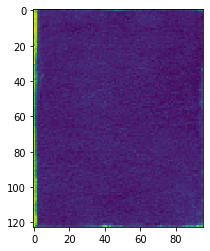

In [228]:
plt.imshow(pthalo_mix[:,:,0])

In [229]:
pthalo_mix_2 = sk.color.convert_colorspace(pthalo_mix, 'RGB', 'hsv')
pthalo_mix_2

array([[[0.46153846, 0.05508475, 0.9254902 ],
        [0.51234568, 0.11894273, 0.89019608],
        [0.52272727, 0.21568627, 0.8       ],
        ...,
        [0.53174603, 0.23463687, 0.70196078],
        [0.53418803, 0.23076923, 0.6627451 ],
        [0.55769231, 0.18705036, 0.54509804]],

       [[0.52564103, 0.05394191, 0.94509804],
        [0.52314815, 0.16289593, 0.86666667],
        [0.52884615, 0.36363636, 0.56078431],
        ...,
        [0.53333333, 0.50561798, 0.34901961],
        [0.53191489, 0.5       , 0.36862745],
        [0.52252252, 0.38947368, 0.37254902]],

       [[0.77083333, 0.03265306, 0.96078431],
        [0.56666667, 0.12295082, 0.95686275],
        [0.54248366, 0.37777778, 0.52941176],
        ...,
        [0.55102041, 0.56321839, 0.34117647],
        [0.54938272, 0.51923077, 0.40784314],
        [0.5141844 , 0.48958333, 0.37647059]],

       ...,

       [[0.62121212, 0.04661017, 0.9254902 ],
        [0.54666667, 0.10638298, 0.92156863],
        [0.54583333, 0

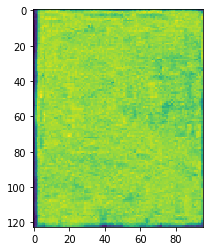

In [232]:
plt.imshow(pthalo_mix_2[:,:,1])